### 3.	Take grayscale image of size 512x512, add some salt & pepper noise and perform the following operations:

        (b)	Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR


In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
originalImage = cv2.imread("img.jpg", cv2.IMREAD_GRAYSCALE)
originalImage = cv2.resize(originalImage, (512, 512))

### Adding Salt & Pepper Noise

In [3]:
def addSaltPeperNoise(image, saltRatio, pepperRatio):
    noisyImage = image.copy()
    numOfPixels = image.size
    numOfSaltPixels = int(saltRatio * numOfPixels)
    numOfPepperPixels = int(pepperRatio * numOfPixels)

    for i in range(numOfSaltPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 255
    
    for i in range(numOfPepperPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 0

    return noisyImage

### Average Filter

In [4]:
def averageFilter(image, kernelSize):
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    filteredImage = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernelRegion = paddedImage[i: i+kernelSize, j: j+kernelSize]
            average = np.mean(kernelRegion)
            filteredImage[i, j] = average
    
    return filteredImage

### Check PSNR

In [5]:
def calcPSNR(originalImage, degradedImage):     #Peak Signal-to-Noise Ratio
    mse = np.mean((originalImage - degradedImage) ** 2)     # Mean Squared Error (MSE)
    if mse == 0:
        return np.inf
    maxPixelValue = np.max(originalImage)
    pnsrValue = 20 * np.log10(maxPixelValue / np.sqrt(mse))
    return round(pnsrValue, 2)

### Plot All Image

Text(0.5, 1.0, 'Filtered Image (PNSR=29.23) - mask (7x7)')

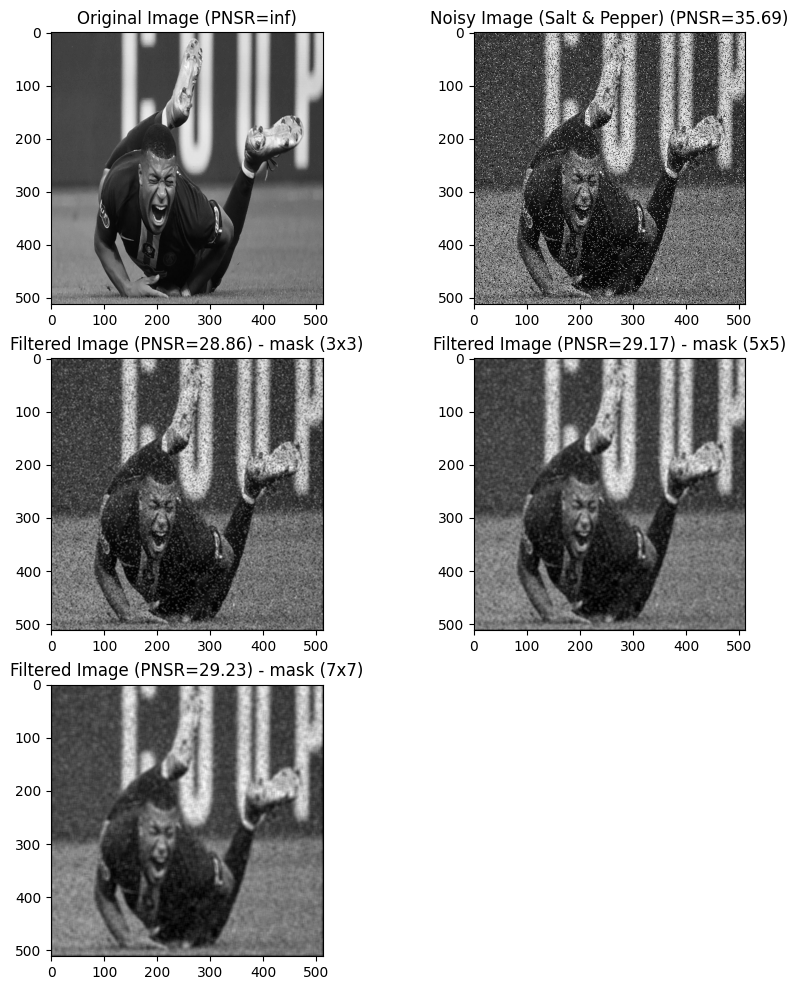

In [6]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title(f"Original Image (PNSR={calcPSNR(originalImage, originalImage)})")

noisyImage = addSaltPeperNoise(originalImage, 0.05, 0.15)
plt.subplot(3, 2, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title(f"Noisy Image (Salt & Pepper) (PNSR={calcPSNR(originalImage, noisyImage)})")

averageFilteredImage = averageFilter(noisyImage, 3)
plt.subplot(3, 2, 3)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Filtered Image (PNSR={calcPSNR(originalImage, averageFilteredImage)}) - mask (3x3)")

averageFilteredImage = averageFilter(noisyImage, 5)
plt.subplot(3, 2, 4)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Filtered Image (PNSR={calcPSNR(originalImage, averageFilteredImage)}) - mask (5x5)")

averageFilteredImage = averageFilter(noisyImage, 7)
plt.subplot(3, 2, 5)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Filtered Image (PNSR={calcPSNR(originalImage, averageFilteredImage)}) - mask (7x7)")